# Project:

Problem Statement: To predict the sales price for each house on various parameters

# Read the Dataset

In [54]:
import pandas as pd

In [55]:
A = pd.read_csv("C:/Users/Admin/Downloads/training_set (1).csv")

In [56]:
A

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Drop unwanted cols:

In [57]:
A=A.drop(labels=["Id"],axis=1)

# Treat missing data
    Created function named replacer under ml_txt file

In [58]:
from ml_txt import replacer
replacer(A)

# Exploratory data analysis
    to check correlation of every column with saleprice

In [59]:
from warnings import filterwarnings
filterwarnings("ignore")
A.corr()[["SalePrice"]]

,SalePrice
MSSubClass,-0.084284
LotFrontage,0.334901
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.475241
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378


# Define X and Y

In [60]:
#MSSubClass,EnclosedPorch,KitchenAbvGr,BsmtHalfBath,LowQualFinSF,BsmtFinSF2,OverallCond
Y = A[["SalePrice"]]
X = A.drop(labels="SalePrice",axis=1)


# Preprocessing data using OHE, Standardization
    Created function named data_prep under ml_txt file

In [61]:
from ml_txt import data_prep
Xnew = data_prep(X)

In [62]:
Xnew

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0,0,0,1,0,0,0,0,1,0
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,0,0,0,1,0,0,0,0,1,0


# Divide data in training and testing set
    function train_test_split used to divide dataset and random state so that reshuffling of data controlled

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# OLS model creation

In [64]:
from statsmodels.api import add_constant,OLS
Xconst = add_constant(Xnew)
ols = OLS(Y,Xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     69.09
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:42:56   Log-Likelihood:                -16580.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1217   BIC:                         3.493e+04
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1609.4026   3177.387      0.507      0.613   -4624.361    7843.167
MSSubClass            -2620.1800   3494.908     -0.750      0.454   -9476.893    4236.533
LotFrontage             864.8680    965.969      0.895      0.371   -1030.280    2760.016
LotArea                7246.0403   1086.909      6.667      0.000    5113.617    9378.464
OverallQual            8911.7772   1397.606      6.376      0.000    6169.793    1.17e+04
OverallCond            6445.9623    969.200      6.651      0.000    4544.475    8347.450
YearBuilt              9300.2619   2296.642      4.050      0.000    4794.446    1.38e+04
YearRemodAdd           1979.9894   1146.784      1.727      0.085    -269.904    4229.883
MasVnrArea             3845.8555   1041.467      3.693      0.000    1802.586    5889.125
BsmtFinSF1             7583.6141   1006.947      7.531      0.000    5608.070    9559.158
BsmtFinSF2             1286.8943   1203.328      1.069      0.285   -1073.934    3647.722
BsmtUnfSF             -1004.0044    805.556     -1.246      0.213   -2584.436     576.427
TotalBsmtSF            7346.2441   1227.390      5.985      0.000    4938.209    9754.279
1stFlrSF               6972.9418   1529.881      4.558      0.000    3971.445    9974.438
2ndFlrSF               1.394e+04   1667.293      8.363      0.000    1.07e+04    1.72e+04
LowQualFinSF          -1538.2162    885.621     -1.737      0.083   -3275.730     199.298
GrLivArea              1.657e+04   1261.895     13.132      0.000    1.41e+04     1.9e+04
BsmtFullBath            572.7869   1023.636      0.560      0.576   -1435.499    2581.073
BsmtHalfBath           -214.3407    722.259     -0.297      0.767   -1631.351    1202.670
FullBath               2222.9491   1212.318      1.834      0.067    -155.515    4601.413
HalfBath                897.7575   1052.284      0.853      0.394   -1166.734    2962.249
BedroomAbvGr          -2921.7491   1112.382     -2.627      0.009   -5104.147    -739.351
KitchenAbvGr          -2938.2511   1245.224     -2.360      0.018   -5381.275    -495.227
TotRmsAbvGrd           2652.1407   1551.137      1.710      0.088    -391.059    5695.340
Fireplaces             1755.9414    982.019      1.788      0.074    -170.697    3682.580
GarageYrBlt             591.1778   1360.079      0.435      0.664   -2077.183    3259.538
GarageCars             2396.2689   1639.385      1.462      0.144    -820.066    5612.604
GarageArea             2927.8561   1655.772      1.768      0.077    -320.627    6176.339
WoodDeckSF             1926.0710    732.963      2.628      0.009     488.061    3364.081
OpenPorchSF             405.5715    759.161      0.534      0.593   -1083.838    1894.981
EnclosedPorch           138.4741    760.430      0.182      0.856   -1353.426    1630.374
3SsnPorch              

# columns with high pvalues to be removed
    cols with pvals >0.9 and 0.4 are removed,to reduce multicolinearity

In [65]:
Q = pd.DataFrame(model.pvalues,columns=["pval"])
x = Q.pval.max()
col_to_drop=Q[Q.pval==x].index[0]
print(col_to_drop)
Xnew = Xnew.drop(labels=[col_to_drop],axis=1)
from statsmodels.api import add_constant,OLS
xconst = add_constant(Xnew)
ols = OLS(Y,xconst)
model = ols.fit()
model.summary()

Exterior2nd_BrkFace


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     69.09
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:43:18   Log-Likelihood:                -16580.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1217   BIC:                         3.493e+04
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1616.7651   3267.946      0.495      0.621   -4794.669    8028.199
MSSubClass            -2620.1800   3494.908     -0.750      0.454   -9476.893    4236.533
LotFrontage             864.8680    965.969      0.895      0.371   -1030.280    2760.016
LotArea                7246.0403   1086.909      6.667      0.000    5113.617    9378.464
OverallQual            8911.7772   1397.606      6.376      0.000    6169.793    1.17e+04
OverallCond            6445.9623    969.200      6.651      0.000    4544.475    8347.450
YearBuilt              9300.2619   2296.642      4.050      0.000    4794.446    1.38e+04
YearRemodAdd           1979.9894   1146.784      1.727      0.085    -269.904    4229.883
MasVnrArea             3845.8555   1041.467      3.693      0.000    1802.586    5889.125
BsmtFinSF1             7583.6141   1006.947      7.531      0.000    5608.070    9559.158
BsmtFinSF2             1286.8943   1203.328      1.069      0.285   -1073.934    3647.722
BsmtUnfSF             -1004.0044    805.556     -1.246      0.213   -2584.436     576.427
TotalBsmtSF            7346.2441   1227.390      5.985      0.000    4938.209    9754.279
1stFlrSF               6972.9418   1529.881      4.558      0.000    3971.445    9974.438
2ndFlrSF               1.394e+04   1667.293      8.363      0.000    1.07e+04    1.72e+04
LowQualFinSF          -1538.2162    885.621     -1.737      0.083   -3275.730     199.298
GrLivArea              1.657e+04   1261.895     13.132      0.000    1.41e+04     1.9e+04
BsmtFullBath            572.7869   1023.636      0.560      0.576   -1435.499    2581.073
BsmtHalfBath           -214.3407    722.259     -0.297      0.767   -1631.351    1202.670
FullBath               2222.9491   1212.318      1.834      0.067    -155.515    4601.413
HalfBath                897.7575   1052.284      0.853      0.394   -1166.734    2962.249
BedroomAbvGr          -2921.7491   1112.382     -2.627      0.009   -5104.147    -739.351
KitchenAbvGr          -2938.2511   1245.224     -2.360      0.018   -5381.275    -495.227
TotRmsAbvGrd           2652.1407   1551.137      1.710      0.088    -391.059    5695.340
Fireplaces             1755.9414    982.019      1.788      0.074    -170.697    3682.580
GarageYrBlt             591.1778   1360.079      0.435      0.664   -2077.183    3259.538
GarageCars             2396.2689   1639.385      1.462      0.144    -820.066    5612.604
GarageArea             2927.8561   1655.772      1.768      0.077    -320.627    6176.339
WoodDeckSF             1926.0710    732.963      2.628      0.009     488.061    3364.081
OpenPorchSF             405.5715    759.161      0.534      0.593   -1083.838    1894.981
EnclosedPorch           138.4741    760.430      0.182      0.856   -1353.426    1630.374
3SsnPorch              

In [66]:
Q = pd.DataFrame(model.pvalues,columns=["pval"])
x = Q.pval.max()
col_to_drop=Q[Q.pval==x].index[0]
print(col_to_drop)
Xnew = Xnew.drop(labels=[col_to_drop],axis=1)
from statsmodels.api import add_constant,OLS
xconst = add_constant(Xnew)
ols = OLS(Y,xconst)
model = ols.fit()
model.summary()

Exterior1st_Stone


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     69.09
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:43:20   Log-Likelihood:                -16580.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1217   BIC:                         3.493e+04
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1588.6556   3849.443      0.413      0.680   -5963.626    9140.937
MSSubClass            -2620.1800   3494.908     -0.750      0.454   -9476.893    4236.533
LotFrontage             864.8680    965.969      0.895      0.371   -1030.280    2760.016
LotArea                7246.0403   1086.909      6.667      0.000    5113.617    9378.464
OverallQual            8911.7772   1397.606      6.376      0.000    6169.793    1.17e+04
OverallCond            6445.9623    969.200      6.651      0.000    4544.475    8347.450
YearBuilt              9300.2619   2296.642      4.050      0.000    4794.446    1.38e+04
YearRemodAdd           1979.9894   1146.784      1.727      0.085    -269.904    4229.883
MasVnrArea             3845.8555   1041.467      3.693      0.000    1802.586    5889.125
BsmtFinSF1             7583.6141   1006.947      7.531      0.000    5608.070    9559.158
BsmtFinSF2             1286.8943   1203.328      1.069      0.285   -1073.934    3647.722
BsmtUnfSF             -1004.0044    805.556     -1.246      0.213   -2584.436     576.427
TotalBsmtSF            7346.2441   1227.390      5.985      0.000    4938.209    9754.279
1stFlrSF               6972.9418   1529.881      4.558      0.000    3971.445    9974.438
2ndFlrSF               1.394e+04   1667.293      8.363      0.000    1.07e+04    1.72e+04
LowQualFinSF          -1538.2162    885.621     -1.737      0.083   -3275.730     199.298
GrLivArea              1.657e+04   1261.895     13.132      0.000    1.41e+04     1.9e+04
BsmtFullBath            572.7869   1023.636      0.560      0.576   -1435.499    2581.073
BsmtHalfBath           -214.3407    722.259     -0.297      0.767   -1631.351    1202.670
FullBath               2222.9491   1212.318      1.834      0.067    -155.515    4601.413
HalfBath                897.7575   1052.284      0.853      0.394   -1166.734    2962.249
BedroomAbvGr          -2921.7491   1112.382     -2.627      0.009   -5104.147    -739.351
KitchenAbvGr          -2938.2511   1245.224     -2.360      0.018   -5381.275    -495.227
TotRmsAbvGrd           2652.1407   1551.137      1.710      0.088    -391.059    5695.340
Fireplaces             1755.9414    982.019      1.788      0.074    -170.697    3682.580
GarageYrBlt             591.1778   1360.079      0.435      0.664   -2077.183    3259.538
GarageCars             2396.2689   1639.385      1.462      0.144    -820.066    5612.604
GarageArea             2927.8561   1655.772      1.768      0.077    -320.627    6176.339
WoodDeckSF             1926.0710    732.963      2.628      0.009     488.061    3364.081
OpenPorchSF             405.5715    759.161      0.534      0.593   -1083.838    1894.981
EnclosedPorch           138.4741    760.430      0.182      0.856   -1353.426    1630.374
3SsnPorch              

In [67]:
Q = pd.DataFrame(model.pvalues,columns=["pval"])
x = Q.pval.max()
col_to_drop=Q[Q.pval==x].index[0]
print(col_to_drop)
Xnew = Xnew.drop(labels=[col_to_drop],axis=1)
from statsmodels.api import add_constant,OLS
xconst = add_constant(Xnew)
ols = OLS(Y,xconst)
model = ols.fit()
model.summary()

Exterior2nd_Brk Cmn


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     69.43
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:43:23   Log-Likelihood:                -16580.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1218   BIC:                         3.492e+04
Df Model:                         241                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1595.1594   3835.697      0.416      0.678   -5930.146    9120.465
MSSubClass            -2621.2930   3493.082     -0.750      0.453   -9474.418    4231.832
LotFrontage             863.4610    963.304      0.896      0.370   -1026.458    2753.380
LotArea                7245.7101   1086.352      6.670      0.000    5114.381    9377.039
OverallQual            8910.8781   1396.393      6.381      0.000    6171.277    1.17e+04
OverallCond            6446.1462    968.763      6.654      0.000    4545.516    8346.776
YearBuilt              9301.0984   2295.362      4.052      0.000    4797.796    1.38e+04
YearRemodAdd           1979.7567   1146.261      1.727      0.084    -269.109    4228.623
MasVnrArea             3845.9744   1041.024      3.694      0.000    1803.575    5888.374
BsmtFinSF1             7583.2504   1006.388      7.535      0.000    5608.804    9557.697
BsmtFinSF2             1287.3731   1202.624      1.070      0.285   -1072.071    3646.817
BsmtUnfSF             -1004.1529    805.195     -1.247      0.213   -2583.875     575.570
TotalBsmtSF            7345.8924   1226.775      5.988      0.000    4939.066    9752.719
1stFlrSF               6974.5011   1527.495      4.566      0.000    3977.687    9971.315
2ndFlrSF               1.394e+04   1662.660      8.385      0.000    1.07e+04    1.72e+04
LowQualFinSF          -1538.4733    885.175     -1.738      0.082   -3275.111     198.164
GrLivArea              1.657e+04   1260.662     13.144      0.000    1.41e+04     1.9e+04
BsmtFullBath            572.8840   1023.205      0.560      0.576   -1434.556    2580.324
BsmtHalfBath           -214.1977    721.931     -0.297      0.767   -1630.564    1202.169
FullBath               2223.1493   1211.783      1.835      0.067    -154.265    4600.564
HalfBath                898.5347   1051.217      0.855      0.393   -1163.862    2960.931
BedroomAbvGr          -2921.2784   1111.705     -2.628      0.009   -5102.347    -740.209
KitchenAbvGr          -2938.4837   1244.665     -2.361      0.018   -5380.409    -496.559
TotRmsAbvGrd           2653.1140   1549.825      1.712      0.087    -387.509    5693.737
Fireplaces             1756.0910    981.591      1.789      0.074    -169.706    3681.888
GarageYrBlt             591.0768   1359.513      0.435      0.664   -2076.170    3258.324
GarageCars             2395.6794   1638.478      1.462      0.144    -818.873    5610.232
GarageArea             2929.2578   1653.780      1.771      0.077    -315.315    6173.831
WoodDeckSF             1926.4665    732.426      2.630      0.009     489.510    3363.423
OpenPorchSF             404.8118    758.009      0.534      0.593   -1082.335    1891.959
EnclosedPorch           138.2024    760.011      0.182      0.856   -1352.873    1629.278
3SsnPorch              

In [68]:
Xnew = Xnew.drop(['MSSubClass', 'BsmtFullBath', 'BsmtHalfBath','GarageYrBlt','OpenPorchSF', 'EnclosedPorch', 'MSZoning_RH',
             'MSZoning_RM','Alley_Pave','LotShape_IR1','LotShape_IR2','LotShape_IR3','LotShape_Reg','LandContour_Bnk','LotConfig_Inside',
             'Neighborhood_Blmngtn','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_MeadowV',
             'Neighborhood_SWISU' ,'Neighborhood_SawyerW', 'Neighborhood_Veenker', 'Condition1_Artery','Condition1_Feedr','Condition1_PosN',
        'Condition1_RRAn','Condition1_RRNe','Condition1_RRNn','BldgType_Duplex','HouseStyle_1.5Fin','HouseStyle_SFoyer','RoofStyle_Mansard',
      'Exterior1st_CBlock','Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_Plywood','Exterior1st_Stucco','Exterior1st_VinylSd',
      'Exterior2nd_AsbShng','Exterior2nd_AsphShn','Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
      'MasVnrType_BrkFace','ExterQual_Fa','ExterCond_Fa','ExterCond_Gd','ExterCond_Po','ExterCond_TA','Foundation_BrkTil','BsmtQual_Fa','BsmtExposure_Av','BsmtFinType1_ALQ',
     'BsmtFinType1_BLQ','BsmtFinType1_Rec','BsmtFinType2_Rec','BsmtFinType2_Unf','Heating_Floor','Heating_GasA','Heating_Grav','Heating_Wall',
     'HeatingQC_Ex','HeatingQC_Fa','HeatingQC_Gd','HeatingQC_TA','CentralAir_N','CentralAir_Y','Electrical_FuseP','Electrical_SBrkr','KitchenQual_Fa',
    'Functional_Maj1' ,'Functional_Maj2','Functional_Mod', 'FireplaceQu_Ex', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_Attchd',
   'GarageType_BuiltIn','GarageType_CarPort','GarageFinish_Fin','GarageFinish_RFn','PavedDrive_P','PavedDrive_Y','PoolQC_Gd','Fence_MnWw',
    'MiscFeature_Gar2','MiscFeature_TenC','SaleType_CWD','SaleType_ConLD','SaleType_ConLI','SaleType_Oth','SaleCondition_Abnorml','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family',
   'SaleCondition_Partial'],axis=1)
from statsmodels.api import add_constant,OLS
Xconst = add_constant(Xnew)
ols = OLS(Y,Xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     97.15
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:43:24   Log-Likelihood:                -16596.
No. Observations:                1460   AIC:                         3.355e+04
Df Residuals:                    1282   BIC:                         3.449e+04
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4566.8780   1.25e+04     -0.365      0.715   -2.91e+04       2e+04
LotFrontage            759.5514    913.883      0.831      0.406   -1033.319    2552.422
LotArea               7381.5152    988.813      7.465      0.000    5441.646    9321.385
OverallQual           9150.0350   1318.190      6.941      0.000    6563.988    1.17e+04
OverallCond           5956.3049    875.247      6.805      0.000    4239.231    7673.379
YearBuilt             1.018e+04   1975.211      5.154      0.000    6306.150    1.41e+04
YearRemodAdd          2698.3392   1075.733      2.508      0.012     587.948    4808.730
MasVnrArea            3668.6962    989.893      3.706      0.000    1726.709    5610.683
BsmtFinSF1            7694.0509    873.086      8.812      0.000    5981.217    9406.885
BsmtFinSF2            1185.3735    908.400      1.305      0.192    -596.740    2967.487
BsmtUnfSF            -1104.6380    724.570     -1.525      0.128   -2526.112     316.836
TotalBsmtSF           7322.3694   1135.770      6.447      0.000    5094.198    9550.540
1stFlrSF              7029.9425   1413.860      4.972      0.000    4256.209    9803.676
2ndFlrSF              1.354e+04   1418.635      9.547      0.000    1.08e+04    1.63e+04
LowQualFinSF         -1580.7227    823.894     -1.919      0.055   -3197.051      35.605
GrLivArea             1.628e+04   1122.182     14.505      0.000    1.41e+04    1.85e+04
FullBath              2098.1296   1141.253      1.838      0.066    -140.799    4337.058
HalfBath               844.8776    992.543      0.851      0.395   -1102.308    2792.064
BedroomAbvGr         -3420.2460   1038.432     -3.294      0.001   -5457.459   -1383.033
KitchenAbvGr         -3398.2769   1157.985     -2.935      0.003   -5670.030   -1126.524
TotRmsAbvGrd          3474.9503   1459.813      2.380      0.017     611.065    6338.836
Fireplaces            1689.6188    837.638      2.017      0.044      46.327    3332.911
GarageCars            2692.4303   1553.301      1.733      0.083    -354.862    5739.722
GarageArea            2713.5554   1543.010      1.759      0.079    -313.547    5740.658
WoodDeckSF            1787.9267    697.277      2.564      0.010     419.997    3155.856
3SsnPorch              971.1061    623.937      1.556      0.120    -252.943    2195.156
ScreenPorch           1814.7757    660.580      2.747      0.006     518.839    3110.713
PoolArea              4026.7185   1105.316      3.643      0.000    1858.291    6195.146
MiscVal               1438.6639   1165.253      1.235      0.217    -847.348    3724.676
MoSold               -1189.1225    637.232     -1.866      0.062   -2439.254      61.009
YrSold                -612.7803    647.710     -0.946      0.344   -1883.468     657.907
MSZoning_C (all)     -2.253e+04   9092.982     -2.477    

In [69]:
#W = pd.DataFrame(model.pvalues,columns=["pval"])
#column_to_drop = W.sort_values(by="pval",ascending=False)[0:1].index[0]
#Xnew = Xnew.drop(labels=[column_to_drop],axis=1)
#print(column_to_drop)
#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
#from statsmodels.api import OLS,add_constant
#Xconst = add_constant(Xnew)
#ols = OLS(Y,Xconst)
#model = ols.fit()
#model.summary()


# Linear regression model
    firstly to create LR model and check for error and overfitting

In [70]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
model=lr.fit(xtrain,ytrain)
pred_tr= model.predict(xtrain)
pred_ts= model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,pred_tr),3)
ts_err = round(mean_absolute_error(ytest,pred_ts),3)
print("Training error:",tr_err)
print("Testing error:",ts_err)
if(tr_err < ts_err):
    print("overfit")
else:
    print("Best fit")

Training error: 12498.139
Testing error: 5134564052675.315
overfit


# Check for sampling bias:
    Original-->Training-->Testing

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

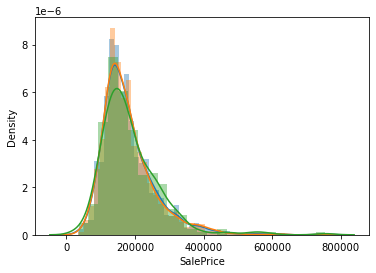

In [71]:
import seaborn as sb
sb.distplot(Y.SalePrice)
sb.distplot(ytrain.SalePrice)
sb.distplot(ytest.SalePrice)

# Creating Ridge & lasso model:
        Due to overfitting applying various penalty values to overcome it
        CV so that no data is missed out 

In [72]:
Q=[]
x=1
for i in range(0,20,1):
    Q.append(x-0.001)
    x = x-0.001

In [73]:
tg = {"alpha": Q}

from sklearn.linear_model import Ridge,Lasso
rr = Ridge()

from sklearn.model_selection import GridSearchCV
cv1 = GridSearchCV(rr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'alpha': 0.999}

In [74]:
ls = Lasso()
from sklearn.model_selection import GridSearchCV
cv2 = GridSearchCV(ls,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel2 = cv2.fit(xtrain,ytrain)
cvmodel2.best_params_

{'alpha': 0.999}

In [75]:
rr = Ridge(alpha=0.999)

model = rr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

tr_err = round(mean_absolute_error(ytrain,pred_tr),3)
ts_err = round(mean_absolute_error(ytest,pred_ts),3)
print("training error:",tr_err)
print("testing error:",ts_err)

training error: 13551.955
testing error: 18784.189


In [76]:
ls = Lasso(alpha= 0.999)

model = ls.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

tr_err = round(mean_absolute_error(ytrain,pred_tr),3)
ts_err = round(mean_absolute_error(ytest,pred_ts),3)
print("training error:",tr_err)
print("testing error:",ts_err)

training error: 12508.697
testing error: 18047.88


# Reading testing data
         1.remove identity cols
         2.Missing data treatment and preprocess data
         3.equalize the cols of training and testing set
         4.predict the values and store results in test set

In [81]:
test= pd.read_csv("C:/Users/Admin/Downloads/testing_set (2).csv")

In [82]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [83]:
#test=test.drop(labels="Id",axis=1)

In [84]:
replacer(test)

In [85]:
cols_keep=list(xtrain.columns)
cols_keep

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlo

In [86]:
cat=[]
con=[]
for i in test.columns:
    if(test[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [87]:
X=data_prep(test)

In [ ]:
X[cols_keep]

In [89]:
cols_add=['Condition2_RRAe', 'RoofMatl_Roll', 'RoofMatl_Membran', 'Heating_OthW', 'Electrical_Mix', 'Heating_Floor', 'Exterior1st_ImStucc', 'GarageQual_Ex', 'Utilities_NoSeWa', 'RoofMatl_Metal', 'MiscFeature_TenC', 'PoolQC_Fa', 'Exterior2nd_Other', 'Condition2_RRAn', 'Condition2_RRNn', 'Exterior1st_Stone', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile']

In [90]:
for i in cols_add:
    X[i]=0

In [91]:
final_preds = model.predict(X[cols_keep])

In [92]:
test["Predicted_sale_Price"]=final_preds

In [93]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_sale_Price
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,168595.452279
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,210974.394702
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,247767.876729
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,255482.605112
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,247499.584653


In [ ]:
test[["Id","Predicted_sale_Price"]].to_csv("Desktop/submission.csv")